## EDOs de 1ª ordem e método de Euler

**Exemplo 3:** A equação diferencial $\frac{du}{dt} = t + 2$ tem solução obtida facilmente por integração fazendo

$$ \int du  = \int (t+2)dt $$

$$ u(t) = \frac{t^2}{2}+2t+ c$$

em que $c$ é a constante de integração. Nesse caso a família de soluções, para alguns valores de $c$ é mostrado abaixo.

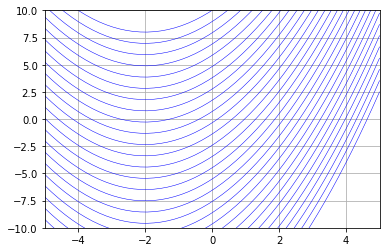

In [19]:
u = lambda t: (t**2/2)+2*t
ti = np.linspace(-5,5)

for c in np.linspace(-10,20,30):
    plt.plot(ti, u(ti)-c, 'b',lw=0.5)
    
plt.ylim(-10,10)
plt.xlim(-5,5)
plt.grid()
plt.show()

Se impormos uma condição inicial, como por exemplo $u(0)= 8$, obtemos o valor $c=8$, o que restringe a solução a uma única curva e não mais à uma família de curvas. Uma equação diferencial com condições iniciais como essa compõem o que chamamos de um *problema de valor inicial* (PVI).

Ou seja, o problema de valor inicial descrito acima pode ser enunciado como

$$ 
\begin{cases} 
\frac {du}{dt}= t+2\\ 
\\
u(0)=8
\end{cases}$$

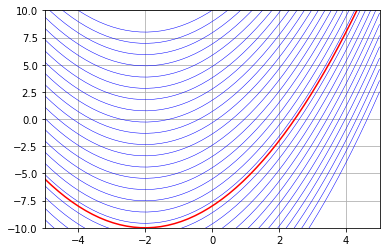

In [20]:
for c in np.linspace(-10,20,30):
    plt.plot(ti, u(ti)-c, 'b',lw=0.5)

# plotando a solução particular
plt.plot(ti, u(ti)-8, 'r')

plt.ylim(-10,10)
plt.xlim(-5,5)
plt.grid()
plt.show()

## Solução numérica de um PVI

Usando a biblioteca `scipy` podemos obter uma solução numérica para um problema como esse usando a função `solve_ivp`, como é mostrado no código abaixo. Para isso, vamos primeiramente importar a função do módulo `integrate` usando a linha mostrada a seguir.

In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
u = lambda t: (t**2/2)+2*t
# Definindo a função usando 'def'
def du(t, y): 
    return t+2

# Dados do problema
I = (0,5)
u0 = [1]
# Discretização do intervalo em 20 pontos
ti = np.linspace(I[0],I[1],20)

# Obtendo a solução
sol = solve_ivp(du, I, u0, t_eval=ti)
print(np.round(sol.y,4))


[[ 1.      1.5609  2.1911  2.8906  3.6593  4.4972  5.4044  6.3809  7.4266
   8.5416  9.7258 10.9792 12.3019 13.6939 15.1551 16.6856 18.2853 19.9543
  21.6925 23.5   ]]


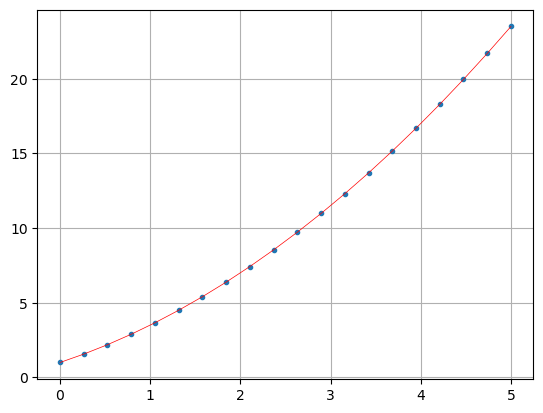

In [9]:
plt.plot(ti, sol.y[0],'.')
plt.plot(ti, u(ti)+u0, 'r', lw=0.5)
plt.grid()
plt.show()

O método usado por padrão na função `solve_ivp` é o `RK45`, ou seja,  o método Runge-Kutta explícito de ordem 5(4). O erro é controlado assumindo a precisão do método de quarta ordem, mas os passos são executadas usando a fórmula precisa de quinta ordem. Mais informações sobre outros métodos disponíveis e sua descrição podem ser acessadas em: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html


## Campo de direções

As soluções apresentadas nos exemplos anteriores são curvas no plano. Se pensarmos nas direções tangentes às curvas-solução em um conjunto de pntos distribuidos no plano temos o qe chamamos de **campo de direções** ou **campo de inclinações**. Como a inclinação de uma curva $y$ em um determinado ponto é dada pela sua derivada $y'$ nesse ponto, podemos construir o campo de direções para uma EDO mesmo não tendo encontrado solução alguma. Com isso é possível fazer deduções qualitativas sobre o comportamento das soluções mesmo ver o gráfico de nenhuma solução. 

Vejamos como podemos obter o campo de direções da equação do exemplo 3.  

In [ ]:
t = np.linspace(-5, 5, 15)
y = np.linspace(-10, 10, 10)

tt, yy = np.meshgrid(t, y)

dy = tt + 2

plt.title("Campo de direções para $y'= t+2$")
plt.quiver(tt,yy,np.ones(dy.shape),dy,width=0.003)
plt.show()

**Exemplo 4:** Vamos obter a solução da equação $y' + y = \cos(t)$ com a condição inicial $y(0) = 1$ e plotar solução juntamente com o campo de direções.


In [ ]:
t, C1 = sp.symbols('t, C1')
y = sp.Function('y')(t)

# uma outra forma de declarar a derivada
dy = sp.Derivative(y,t)

eq = sp.Eq(dy+y, sp.cos(t))
sol = sp.dsolve(eq)
display(sol)

ou

In [ ]:
sol.expand()

Aplicando a condição inicial $y(0)=1$ encontramos $C_1=1/2$. Para fazer as contas com o  SymPy podemos montar a equação substituindo $t=0$ no lado direito (`rhs`) da equação acima usando `subs` e igualando a $1$. Depois basta resolver a equação para $C_1$ usando `solveset`, como é mostrado abaixo:

In [ ]:
eq = sp.Eq(1, sol.rhs.subs(t,0))
display(eq)

In [ ]:
display(sp.solveset(eq, C1))

Agora podemos plotar a solução particular mostrada abaixo e o campo de direções.

In [ ]:
sol.expand().subs(C1,1/2)

In [ ]:
t = np.linspace(0, 10, 15)
y = np.linspace(-3, 3, 15)

tt, yy = np.meshgrid(t, y)
dy = -yy + np.cos(tt)
plt.quiver(tt,yy,np.ones(dy.shape),dy,width=0.002)

ti = np.linspace(0, 10, 50)
yi = np.cos(ti)/2 + np.sin(ti)/2 + 0.5*np.exp(-ti)

plt.plot(ti,yi,'r')
plt.show()

**Exercícios:**

(a) $y'+xy=x$

(b) $y'+6y=e^x$

(c) $y'+3x^2y=sen(x)e^{-x^3}$


**Exercícios:** 

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$

**Exercícios:** Use os passos acima para resolver as sequintes equações e teste a solução obtida.

(a) $y'=\frac{x^2}{y}$ 

(b) $y'+y^2sen(x)=0$

(c) $y'=cos^2(x)cos^2(2y)$

(d) $xy'=(1-y^2)^{1/2}$

(e) $y'+xy=x$

(f) $y'+6y=e^x$

(g) $y'+3x^2y=sen(x)e^{-x^3}$

## Solução numérica de um PVI

Considere a equação diferencial ordinária, $y' = y$, cuja solução é dada por $y(x)=ce^x$ $c\in R$.

Assim, a equação diferencial dada apresenta infinitas soluções, uma vez que, para cada valor escolhido para a constante $c$, temos uma solução, como, por exemplo, $y(x)=c_0e^x$,$y(x)=c_1e^x$,$y(x)=c_2e^x$,sendo $c_0$, $c_1$ , $c_2$ valores fixados,conforme exibido na figura abaixo.


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/pvi01.png" width="560">

Se considerarmos que conhecemos o valor da função $y(x)$ em um ponto, isto é, $x = x_0$ , o valor de $y(x)$ é $y(x_0) = y_0$ e temos uma única solução para a equação proposta. Esta solução única é obtida quando usamos a solução geral da equação diferencial
no ponto $x = x_0$ e obtemos o valor da constante $c$, como segue: $$y(x_0)=y_0$$ 
então 
$$ce^{x_0} = y_0$$ 
logo 
$$c=y_0e^{0-x_0}$$

Assim, a solução única para a equação diferencial é dada por: 

$$y(x) = ce^x = y_0 e^{-x_0} e^x = y_0e^{(x-x_0)}$$

Portanto, $y(x) = y_0 e^{(x-x_0)}$, conforme exibido na figura.

**Definição:** Um Problema de Valor Inicial (PVI) de primeira ordem consiste de uma equação diferencial $y' = f (x,y)$, $x \geq x_0$ e uma condição inicial $y(x_0) = y_0$, em que $y_0$ é um valor dado, chamado de valor inicial.

Neste caso, podemos escrever o PVI da seguinte forma:

$$ 
\begin{cases} 
y'= f(x,y)\\ 
\\
y(x_0)=y_0
\end{cases}$$

Resolver o PVI consiste em determinar uma função $y(x)$ que satisfaça a equação diferencial $y' = f (x,y)$ e a condição inicial $y(x_0) = y_0$.

Se a função $f$ e $ \frac{\partial f}{\partial y}$ são contínuas, temos que o PVI apresenta solução única.



**Discretização:** Resolver numericamente um PVI consiste em calcular aproximações para $y = y(x)$ em pontos discretos $x_0,x_1,x_2,...,x_N$ de um intervalo $[a,b]$.

Para discretizar o intervalo $[a,b]$, tomamos $N$ subintervalos $(N \geq 1)$ e fazemos $x_n = x_0 + nh$, $n = 0,1,2,...,N$ com $x_0 =a$ e $x_N =b$,sendo $h = (x_N −x_0)/N$.

A este conjunto de pontos $x_0,x_1,x_2,...,x_N$ denominamos rede ou malha de pontos discretos, e calculamos aproximações para a função $y(x)$ nestes pontos, isto é, determinamos $y_n$ tal que $y_n \approx y(x_n)$, $n=0,1,...,N$.

A partir de um ponto inicial dado $y(x_0) = y_0$ (valor inicial), calculamos passo a passo, nos pontos 

$x_1 = x_0 +h$, 

$x_2 = x_0 +2h$, 

$x_3 = x_0 +3h$

,...,

$x_n = x_0 +nh$, 

soluções aproximadas $y_n$ para a solução exata $y(x_n)$, $n=0,1,2,...,N$, conforme ilustrado na figura a seguir.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/discretizacao.png" width="560">

## Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/8_SOLUCAO_NUMERICA_DE_EDOs/imagens/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

Esse método também é chamado de método de _Euler-Cauchy_ ou _ponto-inclinação_.

**Exemplo 5:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.

_Solução:_ Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

In [ ]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)

Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.

**Exemplo 6:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.20; x0 = 0.0; xn = 1.0

X = np.arange(x0, xn+h, h); Y = [2.0]                  

f = lambda x,y: x-y+2

for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)

# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

### Exercícios

**1.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $2$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.
$$
\frac{d y}{d t}=y t^2-1,1 y
$$


**2.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $1$ em que $y(0)=1$ analiticamente e numericamente, usando o método de Euler ($h=0,5$ e $0,25$) e plote as soluções.

$$
\frac{d y}{d t}=(1+4 t) \sqrt{y}
$$

**3.** Usando o método de Euler, determine uma solução aproximada para o PVI dado por

$$ \begin{cases} 
y'= -3y+6x+5 \\ 
y(0)=3   
\end{cases}$$

com $x \in [0,1]$ e $N=10$. Compare com a solução exata $y(x)=2e^{-3x}+2x+1$.

**4.** 
Dados o PVI abaixo e a sua solução exata, use dois métodos diferentes para estimar $u(t)$ com o passo sugerido, plote e comente os resultados.

$$ \begin{cases} 
u'= t^2(5-u)\\ 
0 \leq t \leq 2 \\
u(0)=0
\end{cases}$$

Solução exata: $u(t)=5-5e^{-t^3/3}$. Use passo $h=0,25$ e também $h=0,1$.


**Referências**

ARENALES, Selma; DAREZZO, Artur. Cálculo Numérico: aprendizagem com Apoio de Software. [Digite o Local da Editora]: Cengage Learning Brasil, 2016. E-book. ISBN 9788522112821. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788522112821/. Acesso em: 09 abr. 2024.

BOYCE, William E. Equações Diferenciais Elementares e Problemas de Valores de Contorno. [Digite o Local da Editora]: Grupo GEN, 2020. E-book. ISBN 9788521637134. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788521637134/. Acesso em: 19 mar. 2023.

CHAPRA, Steven C.; CANALE, Raymond P. Métodos numéricos para engenharia. [Digite o Local da Editora]: Grupo A, 2016. E-book. ISBN 9788580555691. Disponível em: https://integrada.minhabiblioteca.com.br/#/books/9788580555691/. Acesso em: 09 abr. 2024.